# Sample 15arc-sec GEBCO_2023.nc on OM5 grid

## Apply edits to the topography.

In [1]:
# Notebook editor: Jake.Steinberg

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [-90,90,-300,60]
Region_Name = '26: Deep Ocean Channels for southward-flowing NADW'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

### Overview of three bathymetry products

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


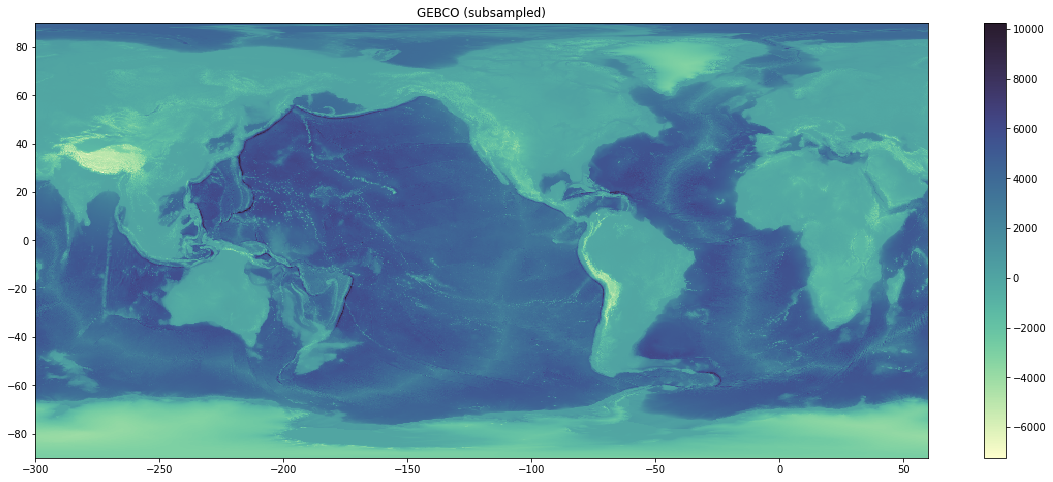

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

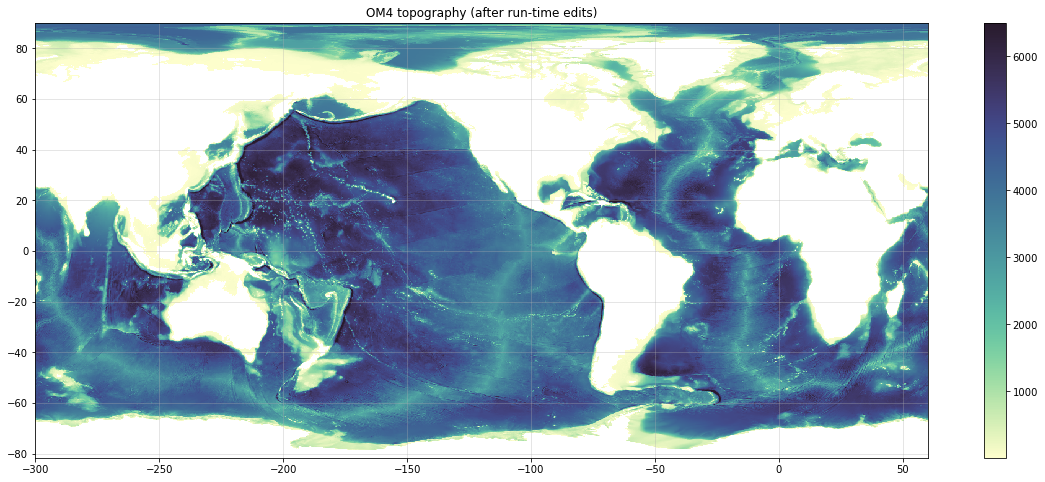

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');
plt.grid(True, alpha=0.4)

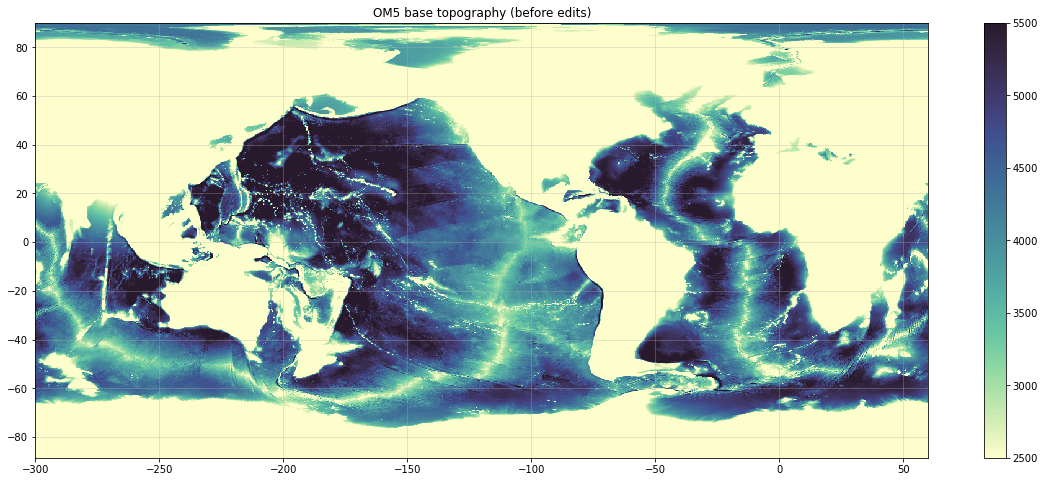

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep, vmin=2500, vmax=5500)
plt.colorbar(); plt.title('OM5 base topography (before edits)');
plt.grid(True, alpha=0.4)

# Edits to narrow channels mentioned in the bottom water pathways described within sections 3.3.3 and 3.3.4 of Paige Lavin's PhD thesis

[Lavin's PhD thesis](https://digital.lib.washington.edu/researchworks/handle/1773/47664) produces a new climatology for global bottom waters (based on all availably hydrography) and uses these to infer circulation pathways for bottom waters. Below, I have listed all mentions of passages, channels, gaps, and straits, in the order that they appear in the text.

In [7]:
plt.rcParams['figure.dpi'] = 80

## 3.3.4 NADW

Gebco (js:je,is:ie) = 32999:38999,64679:70679
OM4 model (js:je,is:ie) = 718:924,1076:1171
OM5 model (js:je,is:ie) = 799:1005,1076:1171
Using xlim = (-30.5, -5.5) ylim = (47.5, 72.5)


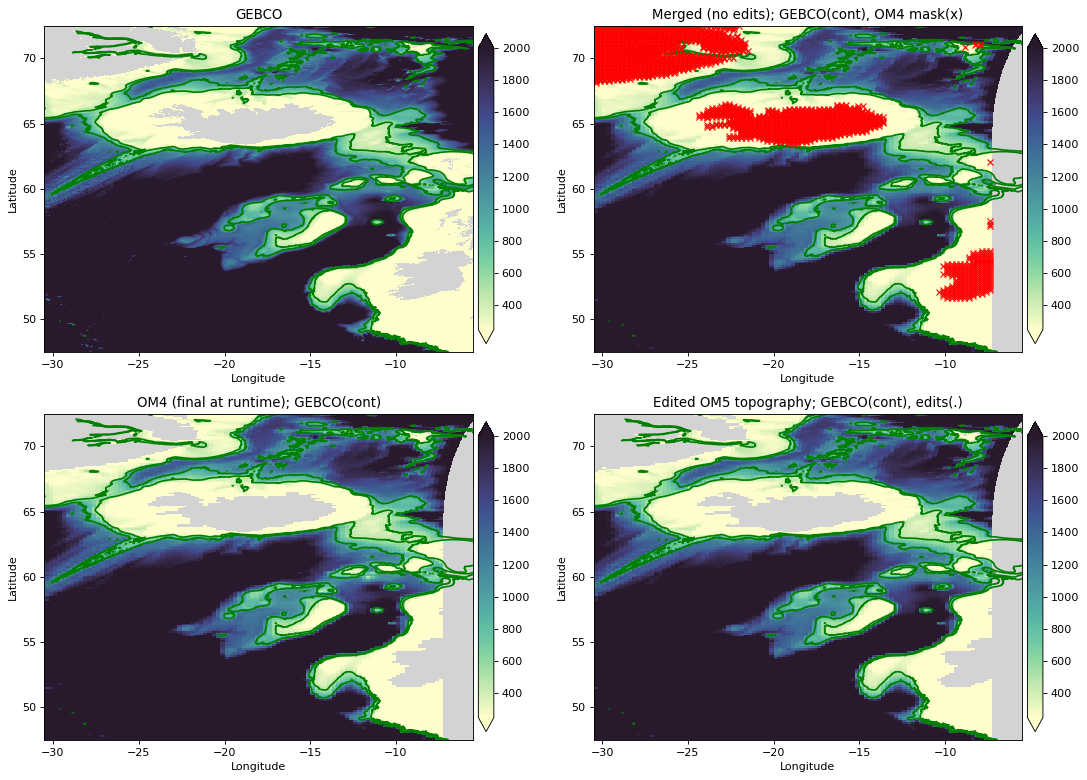

In [8]:
# context map
region = Region(-18, 60, width_lon=25, width_lat=25)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[500,1000], text_depths=False);

### Denmark Strait (-24, 67)

Well-resolved

Gebco (js:je,is:ie) = 36719:38159,64799:66239
OM4 model (js:je,is:ie) = 829:886,1078:1104
OM5 model (js:je,is:ie) = 910:967,1078:1104
Using xlim = (-30.0, -24.0) ylim = (63.0, 69.0)


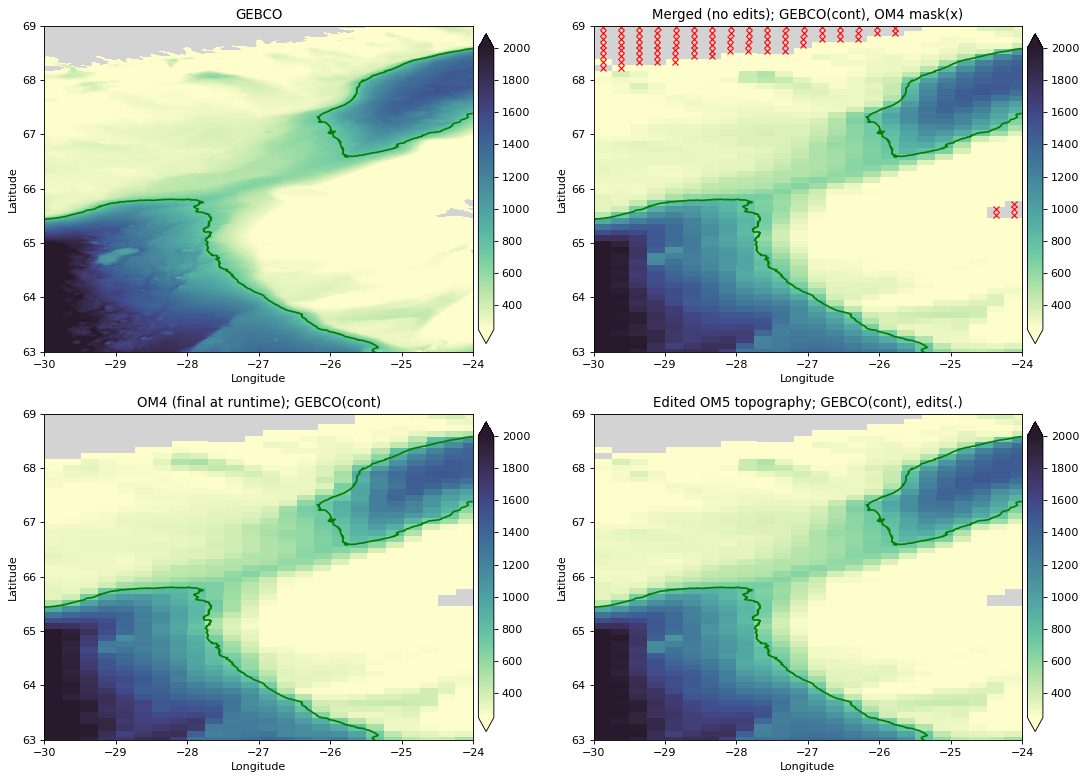

In [9]:
region = Region(-27, 66., width_lon=6, width_lat=6)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[750], text_depths=False);

### Iceland-Faroe Ridge

well resolved

Gebco (js:je,is:ie) = 36359:37079,68999:69719
OM4 model (js:je,is:ie) = 816:845,1148:1162
OM5 model (js:je,is:ie) = 897:926,1148:1162
Using xlim = (-12.5, -9.5) ylim = (61.5, 64.5)


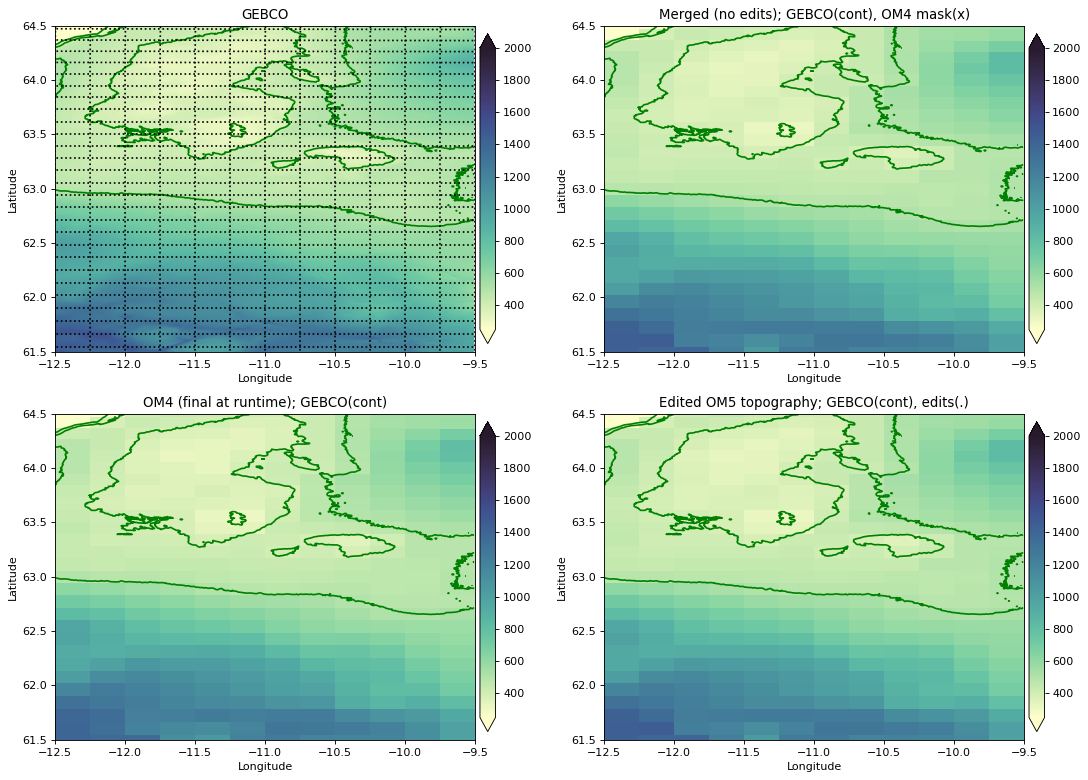

In [10]:
region = Region(-11, 63, width_lon=3, width_lat=3)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[300,400,500], text_depths=False);

### Faroe-Shetland Channel

well resolved

Gebco (js:je,is:ie) = 35939:36539,70619:71219
OM4 model (js:je,is:ie) = 802:824,1175:1187
OM5 model (js:je,is:ie) = 883:905,1175:1187
Using xlim = (-5.75, -3.25) ylim = (59.75, 62.25)


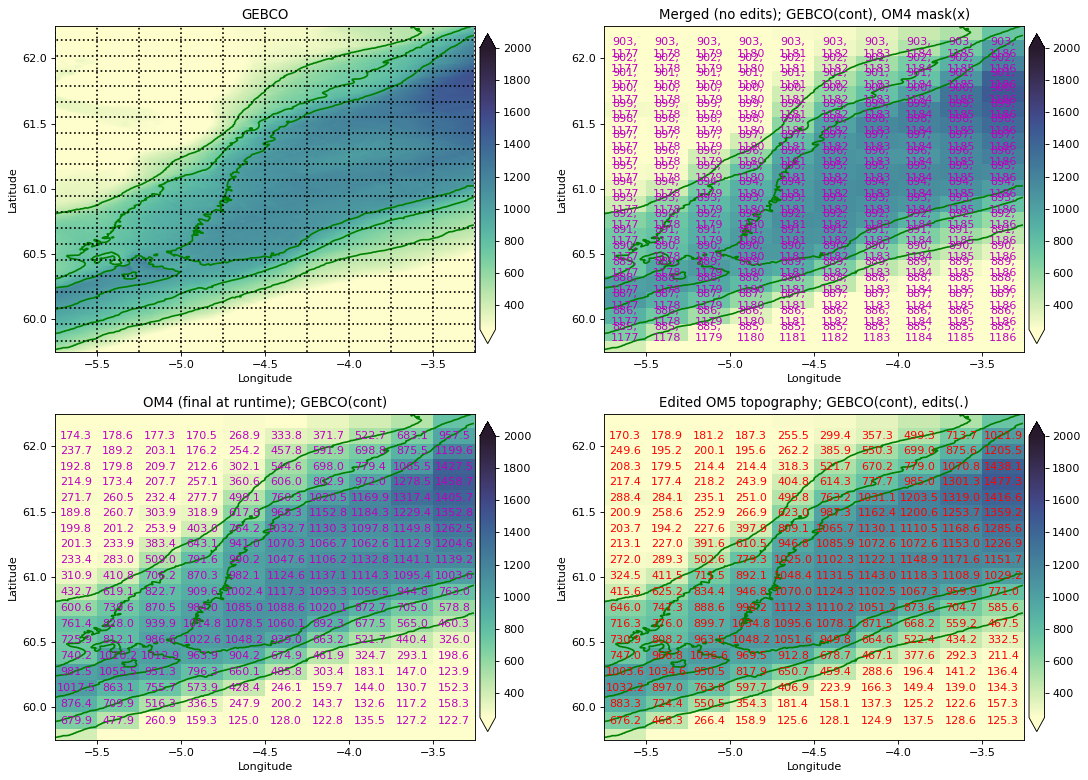

In [11]:
region = Region(-4.5, 61, width_lon=2.5, width_lat=2.5)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[500,750,1000], text_depths=True);

### Wyville Thomson Ridge overflow

Gebco (js:je,is:ie) = 35759:36239,70079:70559
OM4 model (js:je,is:ie) = 796:814,1166:1176
OM5 model (js:je,is:ie) = 877:895,1166:1176
Using xlim = (-8.0, -6.0) ylim = (59.0, 61.0)


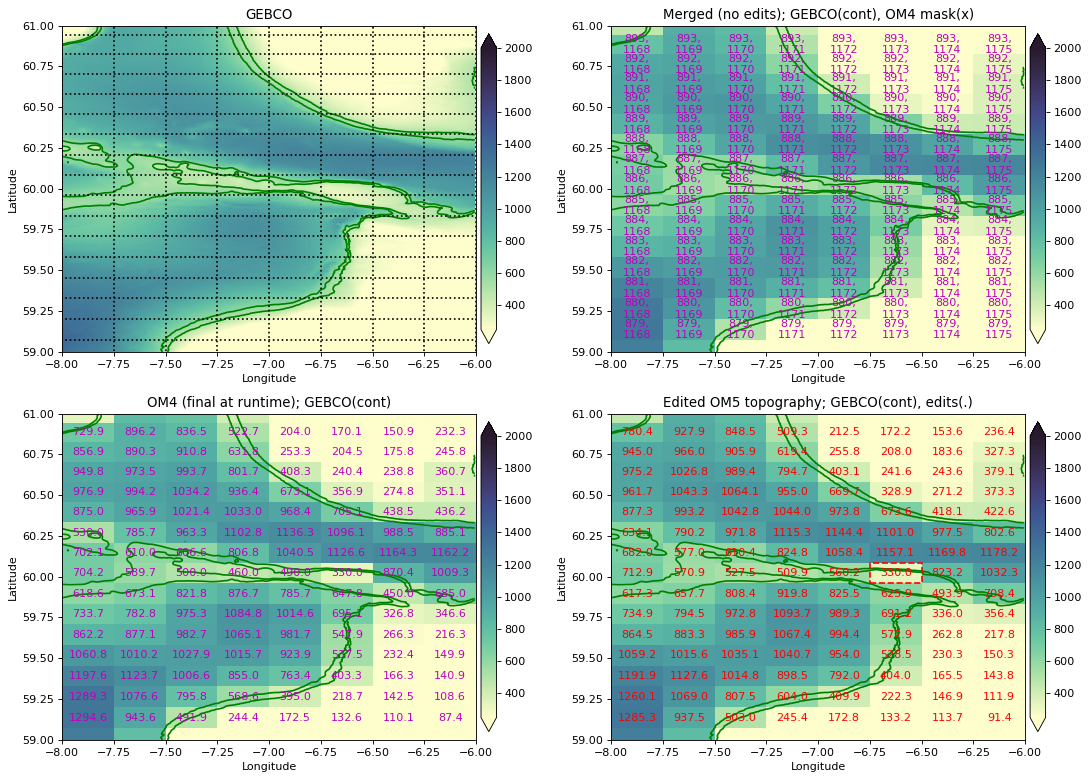

In [12]:
#BGR notes that this is 330 in notebook 23, cell 33.
#BGR after zooming in the colormap I have determined it is close to 330m at the southern face of the cell
#BGR I will keep the OM4 value of 330
#OM5.depth[886, 1173]=350. # made shallower by ~ 150 m
OM5.depth[886, 1173]=330.
region = Region(-7, 60, width_lon=2, width_lat=2)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[500,600], text_depths=True);

### Faroe Bank Channel (already treated in another notebook)

### Dense overflows over Iceland-Faroe Ridge

should be addressed in Iceland-Faroe Ridge cell above

### Gaps in the Reykjanes Ridge

Gebco (js:je,is:ie) = 35639:36839,64919:66119
OM4 model (js:je,is:ie) = 792:835,1080:1102
OM5 model (js:je,is:ie) = 873:916,1080:1102
Using xlim = (-29.5, -24.5) ylim = (58.5, 63.5)


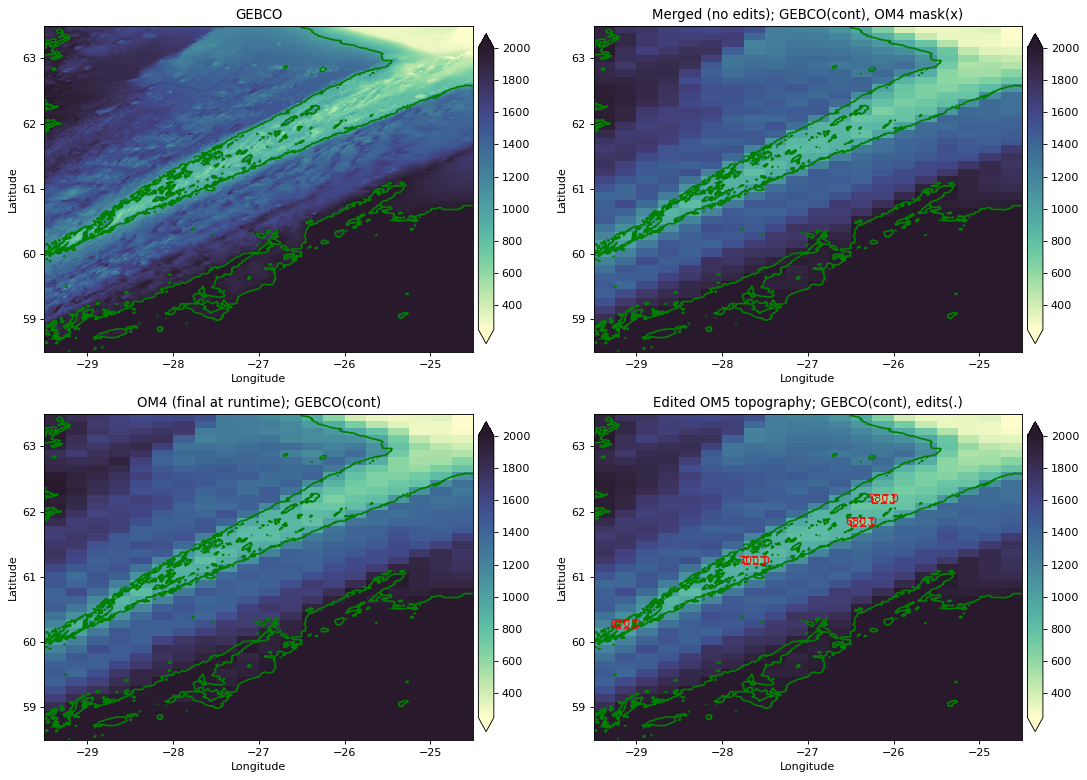

In [13]:
OM5.depth[888, 1083]=830. # made shallower by ~ 100 m
OM5.depth[896, 1089]=700. # made shallower by ~ 100 m
OM5.depth[901, 1094]=680. # made shallower by ~ 100 m
OM5.depth[904, 1095]=580. # made shallower by ~ 100 m

region = Region(-27, 61, width_lon=5, width_lat=5)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[1000,2000], text_depths=False);

### Charlie-Gibbs Fracture Zone

many changes through the center of the fracture zone (mostly making deeper)

Gebco (js:je,is:ie) = 33359:34559,64199:65399
OM4 model (js:je,is:ie) = 727:762,1068:1090
OM5 model (js:je,is:ie) = 808:843,1068:1090
Using xlim = (-32.5, -27.5) ylim = (49.0, 54.0)


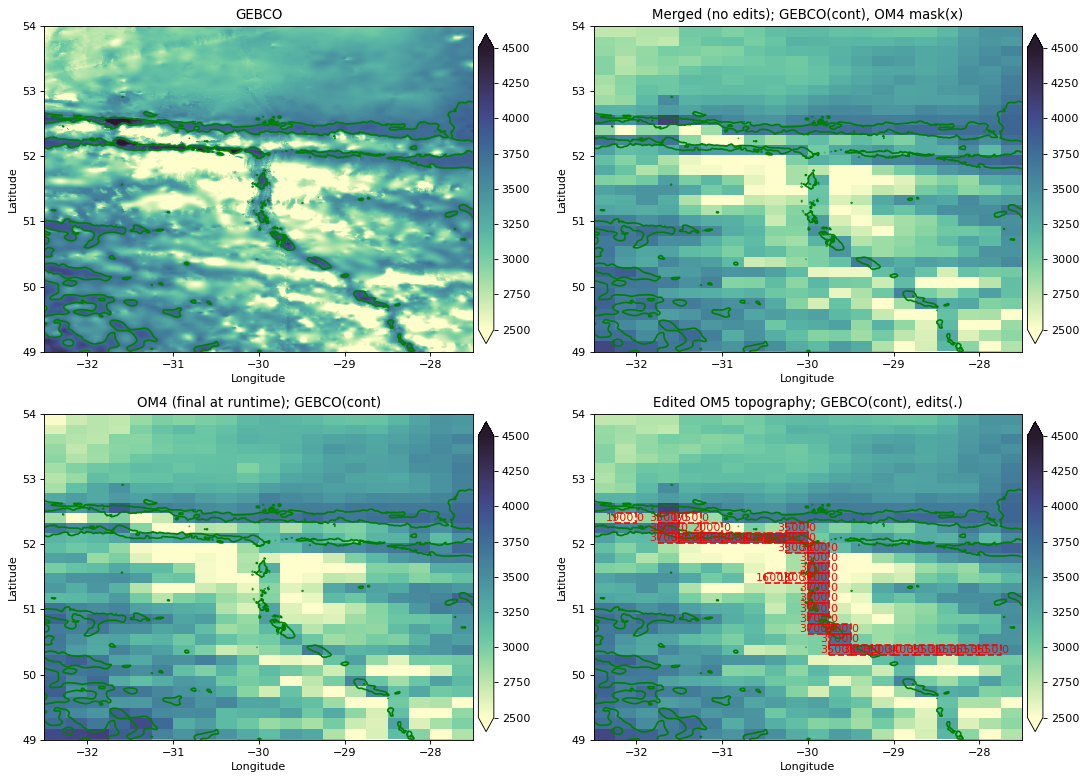

In [14]:
OM5.depth[831, 1074]=1750. # made shallower by ~ 500 m
OM5.depth[831, 1071]=1900. # made shallower by ~ 450 m
OM5.depth[830, 1075]=2000. # made shallower by ~ 400 m
OM5.depth[825, 1078]=1600. # made shallower by ~ 200 m
OM5.depth[825, 1079]=1800. # made shallower by ~ 200 m

OM5.depth[831, 1073]=3500. # made deeper 2954->3500
OM5.depth[830, 1073]=3900. # made deeper 3740->3900
OM5.depth[829, 1073]=3700. # made deeper 3261->3700
OM5.depth[829, 1074]=3800. # made deeper 3607->3800
OM5.depth[829, 1075]=3800. # made deeper 3355->3800
OM5.depth[829, 1076]=3800. # made deeper 3358->3800
OM5.depth[829, 1077]=3800. # made deeper 3364->3800
OM5.depth[829, 1078]=4000. # made deeper 3500->4000
OM5.depth[829, 1079]=3800. # made deeper 3514->3800
OM5.depth[830, 1079]=3500. # made deeper 3031->3500

OM5.depth[828, 1079]=3300. # made deeper 2951->3300
OM5.depth[828, 1080]=3600. # made deeper 3229->3600
OM5.depth[827, 1080]=3500. # made deeper 2775->3500
OM5.depth[826, 1080]=3700. # made deeper 3272->3700
OM5.depth[825, 1080]=3700. # made deeper 3086->3700
OM5.depth[824, 1080]=3700. # made deeper 3110->3700
OM5.depth[823, 1080]=3700. # made deeper 3011->3700
OM5.depth[822, 1080]=3700. # made deeper 3391->3700
OM5.depth[821, 1080]=3700. # made deeper 3493->3700
OM5.depth[820, 1080]=3700. # made deeper 3186->3700
OM5.depth[820, 1081]=3700. # made deeper 3186->3700
OM5.depth[819, 1081]=3700. # made deeper 3439->3700
OM5.depth[818, 1081]=3500. # made deeper 3082->3500
OM5.depth[818, 1082]=3800. # made deeper 3637->3800
OM5.depth[818, 1083]=3600. # made deeper 3380->3600
OM5.depth[818, 1084]=3400. # made deeper 3260->3400
OM5.depth[818, 1085]=3550. # made deeper 3354->3550
OM5.depth[818, 1086]=3550. # made deeper 3318->3550
OM5.depth[818, 1087]=3550. # made deeper 3398->3550
OM5.depth[818, 1088]=3550. # made deeper 3416->3550


region = Region(-30, 51.5, width_lon=5, width_lat=5)
map_region(region, 2500, 4500, GEBCO, OM4, OM5, '', gebco_contours=[3750], text_depths=False);

### Milne Seamount Complex

Gebco (js:je,is:ie) = 30359:31079,56999:57719
OM4 model (js:je,is:ie) = 659:676,948:962
OM5 model (js:je,is:ie) = 740:757,948:962
Using xlim = (-62.5, -59.5) ylim = (36.5, 39.5)


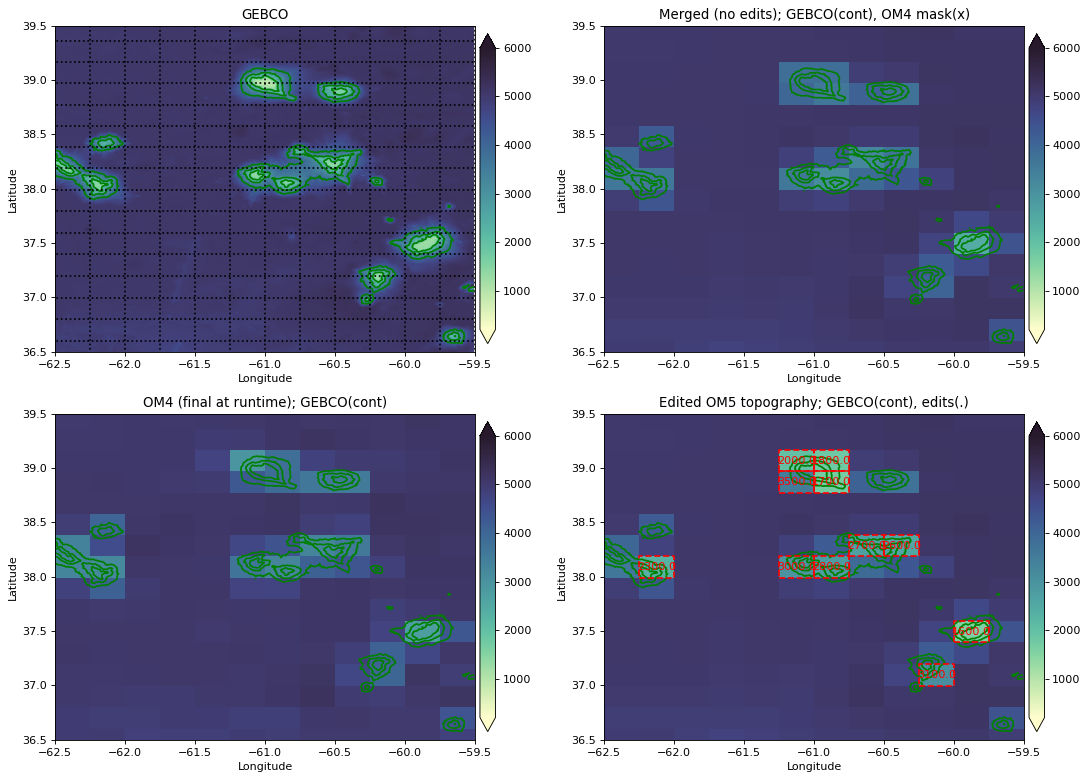

In [15]:
OM5.depth[746, 960]=1600. # from 2463
OM5.depth[754, 955]=2000. # from 3845
OM5.depth[754, 956]=1800. # from 3749
OM5.depth[753, 955]=3500. # from 4061
OM5.depth[753, 956]=1700. # from 3629

OM5.depth[751, 947]=2000. # from 2765

OM5.depth[749, 951]=2300. # from 3552

OM5.depth[753, 944]=2500. # from 2999

OM5.depth[756, 938]=2500. # from 3141

OM5.depth[750, 957]=2700. # from 3278
OM5.depth[750, 958]=2600. # from 3669
OM5.depth[749, 955]=3000. # from 3637
OM5.depth[749, 956]=2800. # from 3143

OM5.depth[744, 959]=3100. # from 4069

region = Region(-61, 38, width_lon=3, width_lat=3)
map_region(region, 200, 6000, GEBCO, OM4, OM5, '', gebco_contours=[2000,3000,4000], text_depths=False);

### Deep, narrow channel escaping southeast Labrador Basin along the western boundary

not sure where this is referencing

### Deep Fracture Zones crossing Mid-Altantic Ridge near (?, 11) and (?, 0)

### Fram Strait

I think ok

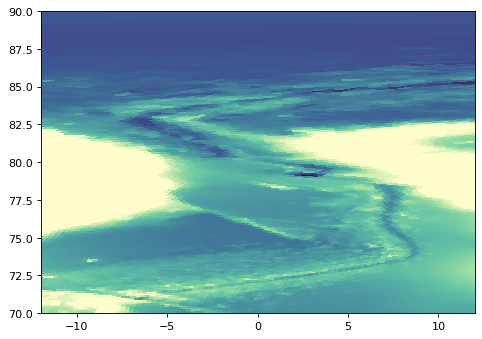

In [16]:
f, ax = plt.subplots(1,1,figsize=(7,5))
ax.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep, vmin=1000, vmax=5500)
# ax.contour(OM5.lonq, OM5.latq, OM5.depth, levels=[1000,2000,3000], colors='k', linewidths=0.5)
ax.set_xlim([-12,12]); ax.set_ylim([70,90]);

Gebco (js:je,is:ie) = 41039:41519,71759:72239
OM4 model (js:je,is:ie) = 1003:1024,1138:1150
OM5 model (js:je,is:ie) = 1084:1105,1138:1150
Using xlim = (-1.0, 1.0) ylim = (81.0, 83.0)


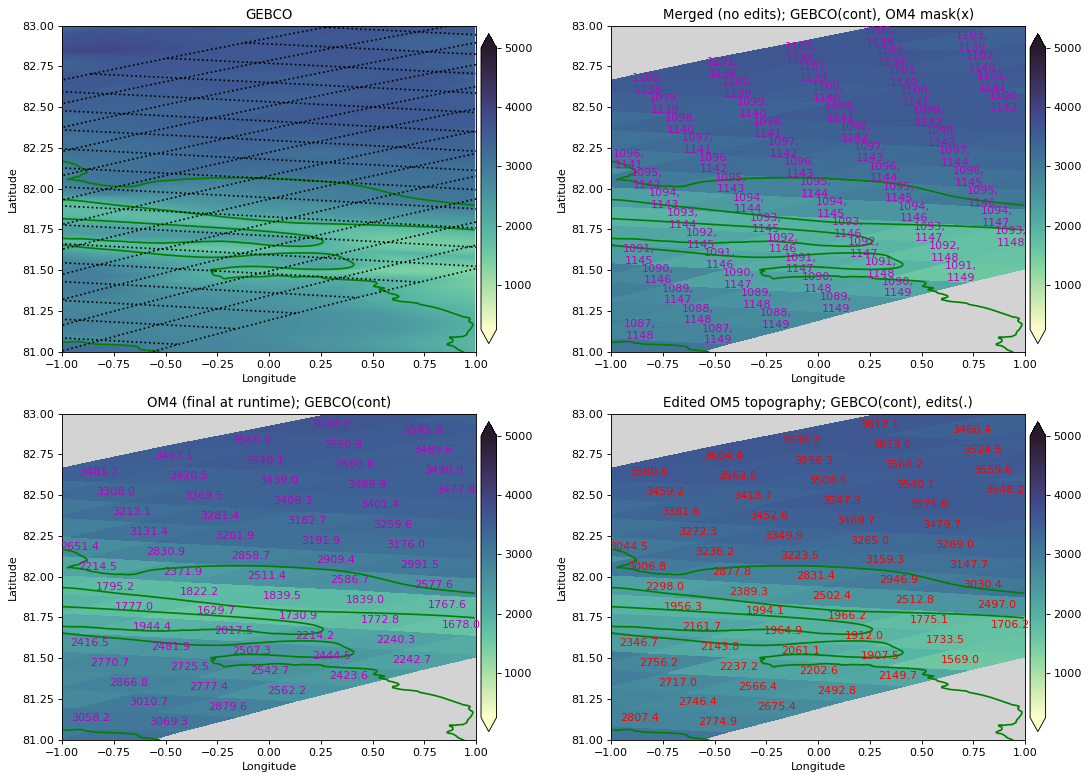

In [17]:
region = Region(0, 82, width_lon=2, width_lat=2)
map_region(region, 250, 5000, GEBCO, OM4, OM5, '', gebco_contours=[250,500,750,1000,2000,3000], text_depths=True);

### Deep gaps in the Lomonosov Ridge near the North Pole, e.g. sill near (156, 88.7)

didn't have time to alter the projection to best view polar region (don't know this area)

### Cooperation Gap within the Alpha-Mendeleev Ridge

didn't have time to alter the projection to best view polar region (don't know this area)

### Baffin Bay sills (?)

I think ok (I'm maybe not the best person to evaluate this north of 75N? ... as grid construction changes?) 

Gebco (js:je,is:ie) = 35999:36959,56159:57119
OM4 model (js:je,is:ie) = 804:840,934:952
OM5 model (js:je,is:ie) = 885:921,934:952
Using xlim = (-66.0, -62.0) ylim = (60.0, 64.0)


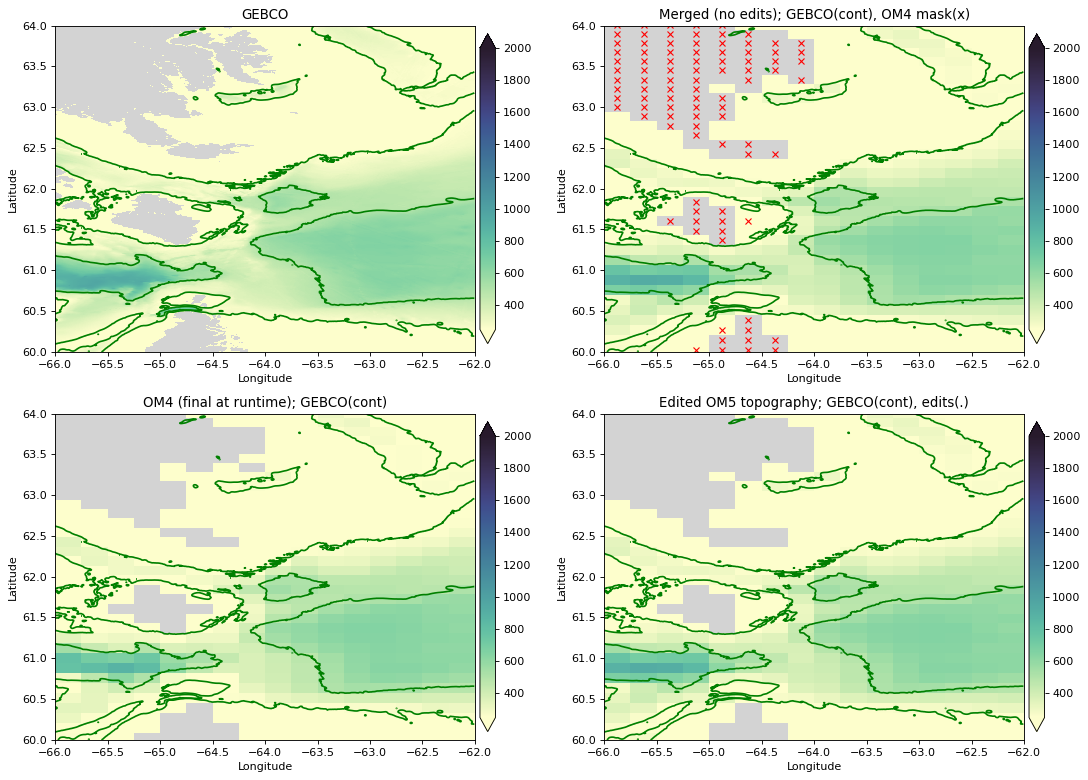

In [18]:
region = Region(-64,62, width_lon=4, width_lat=4)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[250,500], text_depths=False);

### Rockall Rise

well resolved

Gebco (js:je,is:ie) = 35519:35999,68399:68879
OM4 model (js:je,is:ie) = 788:806,1138:1148
OM5 model (js:je,is:ie) = 869:887,1138:1148
Using xlim = (-15.0, -13.0) ylim = (58.0, 60.0)


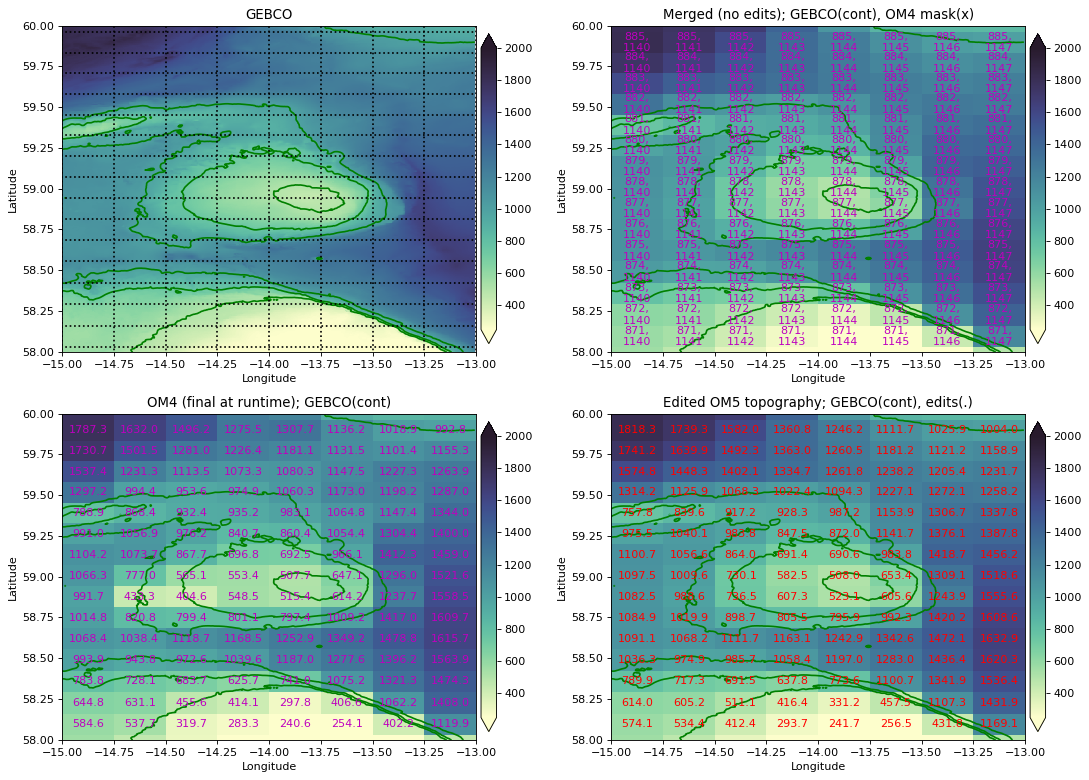

In [19]:
region = Region(-14, 59, width_lon=2, width_lat=2)
map_region(region, 250, 2000, GEBCO, OM4, OM5, '', gebco_contours=[500,750,1000], text_depths=True);

In [20]:
OM5.write_nc("om5_topo_edits_region_26.nc")

New Depth at jEdit=744 iEdit=959 set to 3100.0
New Depth at jEdit=746 iEdit=960 set to 1600.0
New Depth at jEdit=749 iEdit=951 set to 2300.0
New Depth at jEdit=749 iEdit=955 set to 3000.0
New Depth at jEdit=749 iEdit=956 set to 2800.0
New Depth at jEdit=750 iEdit=957 set to 2700.0
New Depth at jEdit=750 iEdit=958 set to 2600.0
New Depth at jEdit=751 iEdit=947 set to 2000.0
New Depth at jEdit=753 iEdit=944 set to 2500.0
New Depth at jEdit=753 iEdit=955 set to 3500.0
New Depth at jEdit=753 iEdit=956 set to 1700.0
New Depth at jEdit=754 iEdit=955 set to 2000.0
New Depth at jEdit=754 iEdit=956 set to 1800.0
New Depth at jEdit=756 iEdit=938 set to 2500.0
New Depth at jEdit=818 iEdit=1081 set to 3500.0
New Depth at jEdit=818 iEdit=1082 set to 3800.0
New Depth at jEdit=818 iEdit=1083 set to 3600.0
New Depth at jEdit=818 iEdit=1084 set to 3400.0
New Depth at jEdit=818 iEdit=1085 set to 3550.0
New Depth at jEdit=818 iEdit=1086 set to 3550.0
New Depth at jEdit=818 iEdit=1087 set to 3550.0
New De